In [ ]:
"""
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
"""

In [12]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics

import matplotlib.image as mpimg

%matplotlib inline  

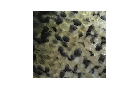

In [13]:
img = mpimg.imread('img/cp.png')

plt.subplot(2, 4, 1)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    